In [3]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr #package for labeling and adding metadata to multi-dimensional arrays
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import os
import matplotlib
import glob
from matplotlib import pyplot as plt
from pathlib import Path
import sys
sys.path.append("C:\\Users\\jamss\\Downloads\\CNN-Encoder-Decoder-main Basic\\CNN-Encoder-Decoder-main")
#sys.path.append("D:\\USD_McGorty_Reaserch\\DDMMachineLearning\\CNN-Encoder-Decoder-main\\CNN-Encoder-Decoder-main")
import nets
from utils import CorrDataSet, CorrDataSet_noshuffle
import TCF_Training_Prep
sys.path.append("C:\\Users\\jamss\Downloads\\PyDDM-main\\PyDDM-main\\PyDDM")
#sys.path.append("C:/Users/Ryan/Downloads/Compressed/PyDDM-main/PyDDM-main/PyDDM")
import ddm_analysis_and_fitting as ddm
import yaml
import pickle

In [5]:
#declare data path, so we have an organzied data directory. We are dealing with a lot data with different data type.

data_path = "C:\\Users\\jamss\\Downloads\\2022_8_31_EncoderTesting\\Testing-CNN-Main\\data\\"
#data_path = "C:\\Users\\Ryan\\Documents\\GitHub\\Testing-CNN\\data\\"
raw_data_path = data_path + "raw_image_data\\"
training_data_path = data_path + "samllframe\\"
training_dataset_path = data_path + "dataset\\"
twotimecorr_data_path = data_path + "twotimecorr\\"
testingfile_data_path = data_path + "tcffs&testingdata\\"
twotimecorr_testing_data_path = testingfile_data_path + 'twotimecorr_testing\\'
ddmfits_path = ".\\ddmfits\\"

In [6]:
def cut_into_training_target_testing (m,a,file_name):
    m_small = np.zeros((a,a,len(m)))
    #m_avg = np.zeros((a,len(m)//a))
    #plt.figure()
    #plt.imshow(m)
    #print(m_small.shape)
    dict_training = dict()
    target_data = file_name +'_target'
    for i in range(len(m)-a+1):
        m_small[:,:,i]=m[i:i+a,i:i+a]
        m_small[:,:,i] = TCF_Training_Prep.fill_diag(m_small[:,:,i])
        if i%a == 0:
            #print(i//50)
            raw_data = file_name+'_'+str(i//50)
            save_data = np.zeros((1,50,50))
            save_data[0]=m_small[:,:,i]
            torch.save(save_data,'data/testing_smallframe/'+raw_data)
            dict_training[raw_data] = {'data':'data/testing_smallframe/'+raw_data, 'target':'data/testing_smallframe/'+target_data}
    torch.save(dict_training, 'data/tcffs&testingdata/'+file_name)
    target = m_small.mean(axis=-1)
    save_data_target = np.zeros((1,50,50))
    save_data_target[0] = target
    torch.save(save_data_target, 'data/testing_smallframe/'+target_data)
    return m_small,target
def avg_dt (m):
    avg = np.zeros(len(m.diagonal()))
    for i in range (len(m.diagonal())):
        avg[i]=np.mean(m.diagonal(i).detach().numpy())
    return avg

In [7]:
ddm_analysis_parameters_str = """
DataDirectory: 'C:\\Users\\jamss\\Downloads\\StevenData\\1umBead_DexDilution_2.5%_T1_1\\'
FileName: '1umBead_DexDilution_2.5%_T1_1_MMStack_Pos0.ome.tif'
Metadata:
  pixel_size: .187 # size of pixel in um
  frame_rate: 25 #frames per second
Analysis_parameters:
  starting_frame_number: 0
  ending_frame_number: 3000
  number_lag_times: 100
  last_lag_time: 600
  crop_to_roi: [0,256,0,256]
  binning: yes
  bin_size: 2
  use_windowing_function: no
Fitting_parameters:
  model: 'DDM Matrix - Single Exponential'
  Tau: [1.0, 0.001, 10]
  StretchingExp: [1.0, 0.5, 3.1]
  Amplitude: [1e2, 1, 1e6]
  Background: [2.5e4, 0, 1e7]
  Good_q_range: [5, 20]
"""
parameters_as_dictionary = yaml.safe_load(ddm_analysis_parameters_str)

In [8]:
frame_rate = 25
data_file = 'dex_dilution81_2949'
ddm_calc = ddm.DDM_Analysis(parameters_as_dictionary)

Provided metadata: {'pixel_size': 0.187, 'frame_rate': 25}
Image shape: 3000-by-256-by-256
Number of frames to use for analysis: 3000
Maximum lag time (in frames): 600
Number of lag times to compute DDM matrix: 100
New dimensions after cropping: 256-by-256
Applying binning...
Dimensions after binning (3000, 128, 128), the new pixel size 0.374


The file C:\Users\jamss\Downloads\StevenData\1umBead_DexDilution_2.5%_T1_1\1umBead_DexDilution_2.5%_T1_1_MMStack_Pos0.ome_ddmmatrix.nc already exists. So perhaps the DDM matrix was calculated already?
Do you still want to calculate the DDM matrix? (y/n): 


2022-09-12 01:51:11,851 - DDM Calculations - Running dt = 1...
2022-09-12 01:51:15,804 - DDM Calculations - Running dt = 5...
2022-09-12 01:51:18,355 - DDM Calculations - Running dt = 9...
2022-09-12 01:51:20,434 - DDM Calculations - Running dt = 13...
2022-09-12 01:51:22,396 - DDM Calculations - Running dt = 17...
2022-09-12 01:51:24,207 - DDM Calculations - Running dt = 21...
2022-09-12 01:51:25,850 - DDM Calculations - Running dt = 25...
2022-09-12 01:51:27,459 - DDM Calculations - Running dt = 30...
2022-09-12 01:51:29,034 - DDM Calculations - Running dt = 35...
2022-09-12 01:51:30,551 - DDM Calculations - Running dt = 42...
2022-09-12 01:51:32,004 - DDM Calculations - Running dt = 50...
2022-09-12 01:51:33,401 - DDM Calculations - Running dt = 59...
2022-09-12 01:51:34,756 - DDM Calculations - Running dt = 70...
2022-09-12 01:51:36,100 - DDM Calculations - Running dt = 83...
2022-09-12 01:51:37,418 - DDM Calculations - Running dt = 98...
2022-09-12 01:51:38,761 - DDM Calculations 

DDM matrix took 39.07259488105774 seconds to compute.
 Background estimate ± std is 786.08 ± 51.50


C:\Users\jamss\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


<xarray.Dataset>
Dimensions:           (lagtime: 100, q_y: 128, q_x: 128, q: 64, y: 128, x: 128, frames: 100)
Coordinates:
  * lagtime           (lagtime) float64 0.04 0.08 0.12 0.16 ... 22.04 23.0 24.0
    framelag          (frames) int32 1 2 3 4 5 6 7 ... 486 507 528 551 575 600
  * q_y               (q_y) float64 -8.4 -8.269 -8.137 ... 8.006 8.137 8.269
  * q_x               (q_x) float64 -8.4 -8.269 -8.137 ... 8.006 8.137 8.269
  * q                 (q) float64 0.0 0.1312 0.2625 0.3937 ... 8.006 8.137 8.269
  * y                 (y) int32 0 1 2 3 4 5 6 7 ... 121 122 123 124 125 126 127
  * x                 (x) int32 0 1 2 3 4 5 6 7 ... 121 122 123 124 125 126 127
Dimensions without coordinates: frames
Data variables:
    ddm_matrix_full   (lagtime, q_y, q_x) float64 218.2 214.5 ... 334.8 229.1
    ddm_matrix        (lagtime, q) float64 0.0 773.5 919.2 ... 743.1 711.7 698.0
    first_image       (y, x) float64 2.265e+03 2.26e+03 ... 2.331e+03 2.345e+03
    alignment_factor  (lagtime, q) float64 nan 6.123e-17 ... -0.1319 -0.1108
    avg_image_ft      (q) float64 0.0 1.106e+06 4.979e+05 ... 385.1 366.1 362.0
    num_pairs_per_dt  (lagtime) int32 2999 2998 2997 1498 1498 ... 15 14 13 12
    B                 float64 786.1
    B_std             float64 51.5
    Amplitude         (q) float64 -786.1 2.212e+06 9.95e+05 ... -53.84 -62.1
    ISF               (lagtime, q) float64 0.0 1.0 0.9999 ... -0.3819 -0.4179
Attributes: (12/21)
    units:                   Intensity
    lagtime:                 sec
    q:                       μm$^{-1}$
    x:                       pixels
    y:                       pixels
    info:                    ddm_matrix is the averages of FFT difference ima...
    ...                      ...
    number_lag_times:        100
    last_lag_time:           600
    crop_to_roi:             [0, 256, 0, 256]
    binning:                 True
    bin_size:                2
    use_windowing_function:  False

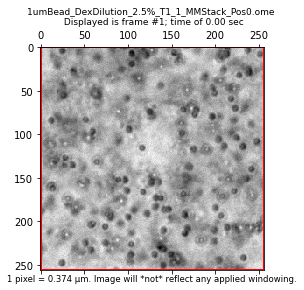

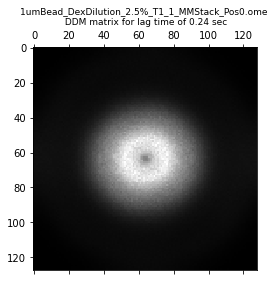

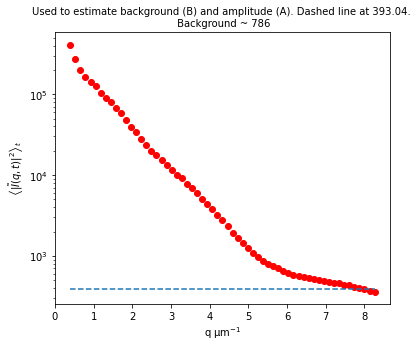

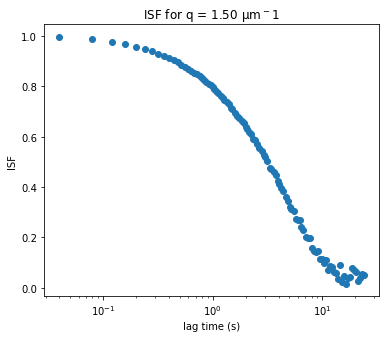

In [10]:
ddm_calc.calculate_DDM_matrix()

In [13]:
data_file = "dexdilution1_2949"

In [14]:
ddm_fit = ddm.DDM_Fit(parameters_as_dictionary)
ddm_fit.set_parameter_bounds('Tau',[0.001, 1000])
fit01 = ddm_fit.fit(name_fit = 'fit01', display_table=False)

xr.Dataset(fit01).to_netcdf(ddmfits_path+data_file+"fit_of_ddmmatrix_full_data.nc")

,Initial guess,Minimum,Maximum
Amplitude,100.0,1.000,1000000.0
Tau,1.0,0.001,10.0
Background,25000.0,0.000,10000000.0
StretchingExp,1.0,0.500,3.1


File C:\Users\jamss\Downloads\StevenData\1umBead_DexDilution_2.5%_T1_1\1umBead_DexDilution_2.5%_T1_1_MMStack_Pos0.ome_ddmmatrix.nc not found.
Perhaps you meant to load one of...
	C:\Users\jamss\Downloads\StevenData\1umBead_DexDilution_2.5%_T1_1\1umBead_DexDilution_2.5%_T1_1_MMStack_Pos0.ome_c=0_ddmmatrix.nc
By default, loading C:\Users\jamss\Downloads\StevenData\1umBead_DexDilution_2.5%_T1_1\1umBead_DexDilution_2.5%_T1_1_MMStack_Pos0.ome_c=0_ddmmatrix.nc
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit01'.


In [15]:
output_dir = "C:\\Users\\jamss\\Downloads\\2022_8_31_EncoderTesting\\Testing-CNN-Main\\output_js\\"
#output_dir = "C:\\Users\\Ryan\\Documents\\GitHub\\Testing-CNN\\output_ry\\"
autoencoder = "autoencoder2d_best_lr_1e-05_latent_space_20_batchsize_8_cv_10_10_k_1_1_wd_0"


In [16]:
def cut_into_training_qtMatrix_isf(ddm_matrix_variable,ddm_matrix_dataset,dt,lagtime,file_name, #will return the raw and target data, without saving it into small frames
                                   qmin=1, qmax=47):
    totalframe = ddm_matrix_variable.shape[1]
    
    target_data = file_name +'_target_' + str((totalframe-lagtime)//dt)
    dict_training = dict()
    
    new_ddm_matrix = ddm.recalculate_ISF_with_new_background(ddm_matrix_dataset.copy(), background_method=1)
    background = new_ddm_matrix.B
    amplitude = new_ddm_matrix.Amplitude
    
    
    target = ddm_matrix_variable[:lagtime,:,qmin:qmax].mean(axis=1)
    target = 1 - ((target - background)/amplitude[qmin:qmax])
    
    
    save_data_target = np.zeros((1,target.shape[0],target.shape[1]))
    save_data_target[0] = target
    #torch.save(save_data_target, 'data/smallframe/'+target_data)
    
    for i in range(0,totalframe-lagtime,dt):
        #get the noisy data:
        #print(i)
        index = i//dt
        raw_data = file_name+'_'+str(index)+'of'+str((totalframe-lagtime)//dt)

        noisy_data = ddm_matrix_variable[:lagtime,i:i+dt,qmin:qmax].mean(axis=1)
        noisy_data = 1 - ((noisy_data - background)/amplitude[qmin:qmax]) #calculate the ISF
        
        save_data = np.zeros((1, noisy_data.shape[0], noisy_data.shape[1]))
        
        #torch.save(save_data,'data/smallframe/'+raw_data)
        dict_training[raw_data] = {'data':'data/smallframe/'+raw_data, 'target':'data/smallframe/'+target_data}
        #save the noisy data as pytorch array or whatever we need...
    #torch.save(dict_training, 'data/dataset/'+file_name+'_'+str((totalframe-lagtime)//dt))
    return noisy_data,target

In [17]:
data_file = 'dexdilution1_2949'
ae = torch.load(output_dir+autoencoder,map_location=torch.device('cpu'))
ds = CorrDataSet_noshuffle(training_dataset_path+data_file)
print(ds.uids)
dataloader = DataLoader(ds, batch_size=2950, shuffle=False, num_workers=0)
a = dataloader
a=next(iter(dataloader))
X = a["data"].float().to('cpu')
X_targ = a["target"].float().to('cpu')
X_new = ae(X)

['dexdilution1_0of2949', 'dexdilution1_1of2949', 'dexdilution1_2of2949', 'dexdilution1_3of2949', 'dexdilution1_4of2949', 'dexdilution1_5of2949', 'dexdilution1_6of2949', 'dexdilution1_7of2949', 'dexdilution1_8of2949', 'dexdilution1_9of2949', 'dexdilution1_10of2949', 'dexdilution1_11of2949', 'dexdilution1_12of2949', 'dexdilution1_13of2949', 'dexdilution1_14of2949', 'dexdilution1_15of2949', 'dexdilution1_16of2949', 'dexdilution1_17of2949', 'dexdilution1_18of2949', 'dexdilution1_19of2949', 'dexdilution1_20of2949', 'dexdilution1_21of2949', 'dexdilution1_22of2949', 'dexdilution1_23of2949', 'dexdilution1_24of2949', 'dexdilution1_25of2949', 'dexdilution1_26of2949', 'dexdilution1_27of2949', 'dexdilution1_28of2949', 'dexdilution1_29of2949', 'dexdilution1_30of2949', 'dexdilution1_31of2949', 'dexdilution1_32of2949', 'dexdilution1_33of2949', 'dexdilution1_34of2949', 'dexdilution1_35of2949', 'dexdilution1_36of2949', 'dexdilution1_37of2949', 'dexdilution1_38of2949', 'dexdilution1_39of2949', 'dexdilut

In [18]:
X_new.shape

torch.Size([2949, 1, 50, 46])

In [19]:
X_targ.shape

torch.Size([2949, 1, 50, 46])

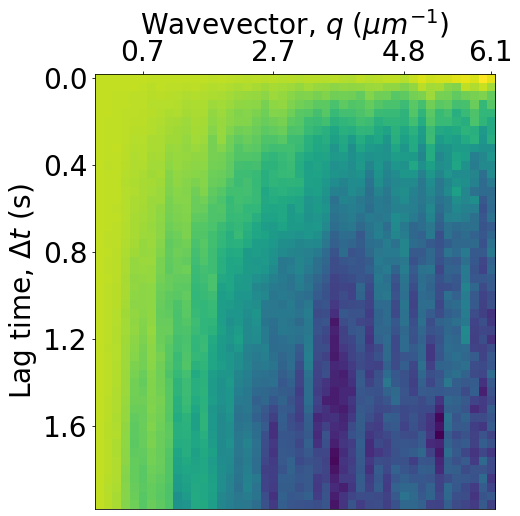

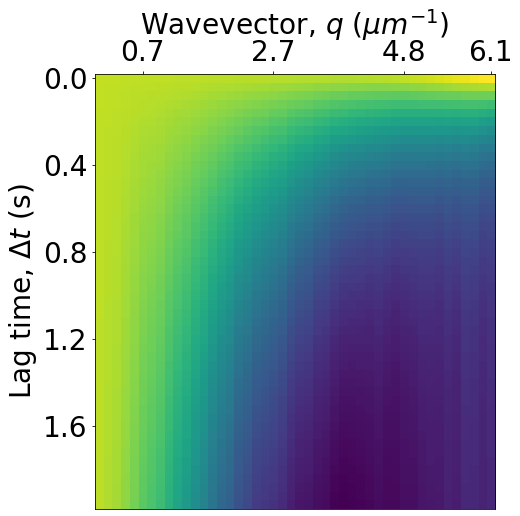

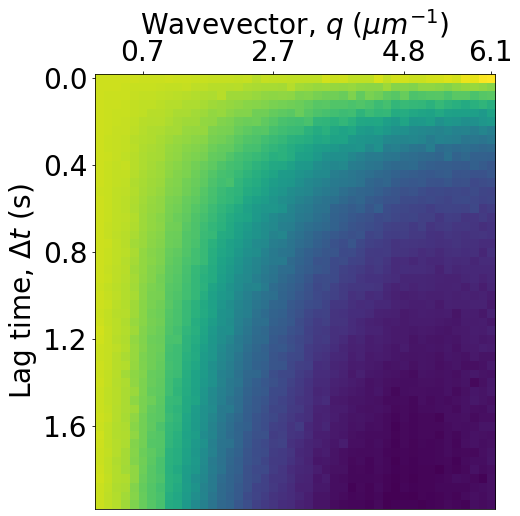

In [31]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(8,8))
plt.matshow(X[0,0,:,:].detach().numpy(), fignum=0)

q_indices = [5,20,35,45]
ax.set_xticks(q_indices)
q_labels = []
for qindex in q_indices:
    q_labels.append("%.1f" % fit01.q[qindex])
ax.set_xticklabels(q_labels)

lagtimes_frames = np.array([0,10,20,30,40])
ax.set_yticks(lagtimes_frames)
time_labels = lagtimes_frames/25.0
ax.set_yticklabels(time_labels)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_xlabel("Wavevector, $q$ ($\mu m^{-1}$)", fontsize=28)
ax.set_ylabel("Lag time, $\Delta t$ (s)", fontsize=28)
ax.tick_params(direction='out', which='both', labelsize=28)
#plt.title("Raw", fontsize = 34)
plt.savefig("ddmmatrix_qdt_matrix.png", bbox_inches ='tight')


fig,ax = plt.subplots(figsize=(8,8))
plt.matshow(X_targ[0,0,:,:].detach().numpy(), fignum=0)

q_indices = [5,20,35,45]
ax.set_xticks(q_indices)
q_labels = []
for qindex in q_indices:
    q_labels.append("%.1f" % fit01.q[qindex])
ax.set_xticklabels(q_labels)

lagtimes_frames = np.array([0,10,20,30,40])
ax.set_yticks(lagtimes_frames)
time_labels = lagtimes_frames/25.0
ax.set_yticklabels(time_labels)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_xlabel("Wavevector, $q$ ($\mu m^{-1}$)", fontsize=28)
ax.set_ylabel("Lag time, $\Delta t$ (s)", fontsize=28)
ax.tick_params(direction='out', which='both', labelsize=28)
#plt.title("Target", fontsize = 34)

plt.savefig("ddmmatrix_qdt_matrix.png", bbox_inches ='tight')

fig,ax = plt.subplots(figsize=(8,8))
plt.matshow(X_new[0,0,:,:].detach().numpy(), fignum=0)

q_indices = [5,20,35,45]
ax.set_xticks(q_indices)
q_labels = []
for qindex in q_indices:
    q_labels.append("%.1f" % fit01.q[qindex])
ax.set_xticklabels(q_labels)

lagtimes_frames = np.array([0,10,20,30,40])
ax.set_yticks(lagtimes_frames)
time_labels = lagtimes_frames/25.0
ax.set_yticklabels(time_labels)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_xlabel("Wavevector, $q$ ($\mu m^{-1}$)", fontsize=28)
ax.set_ylabel("Lag time, $\Delta t$ (s)", fontsize=28)
ax.tick_params(direction='out', which='both', labelsize=28)
#plt.title("CNN Output", fontsize = 34)

plt.savefig("ddmmatrix_qdt_matrix.png", bbox_inches ='tight')

In [77]:
index1 = 50;
plt.matshow(np.hstack((X[index1,0,:,:].detach().numpy())))
plt.matshow(X_targ[index,0,:,:].detach().numpy())
plt.matshow(np.hstack((X_new[index1,0,:,:].detach().numpy())))


ValueError: not enough values to unpack (expected 2, got 1)

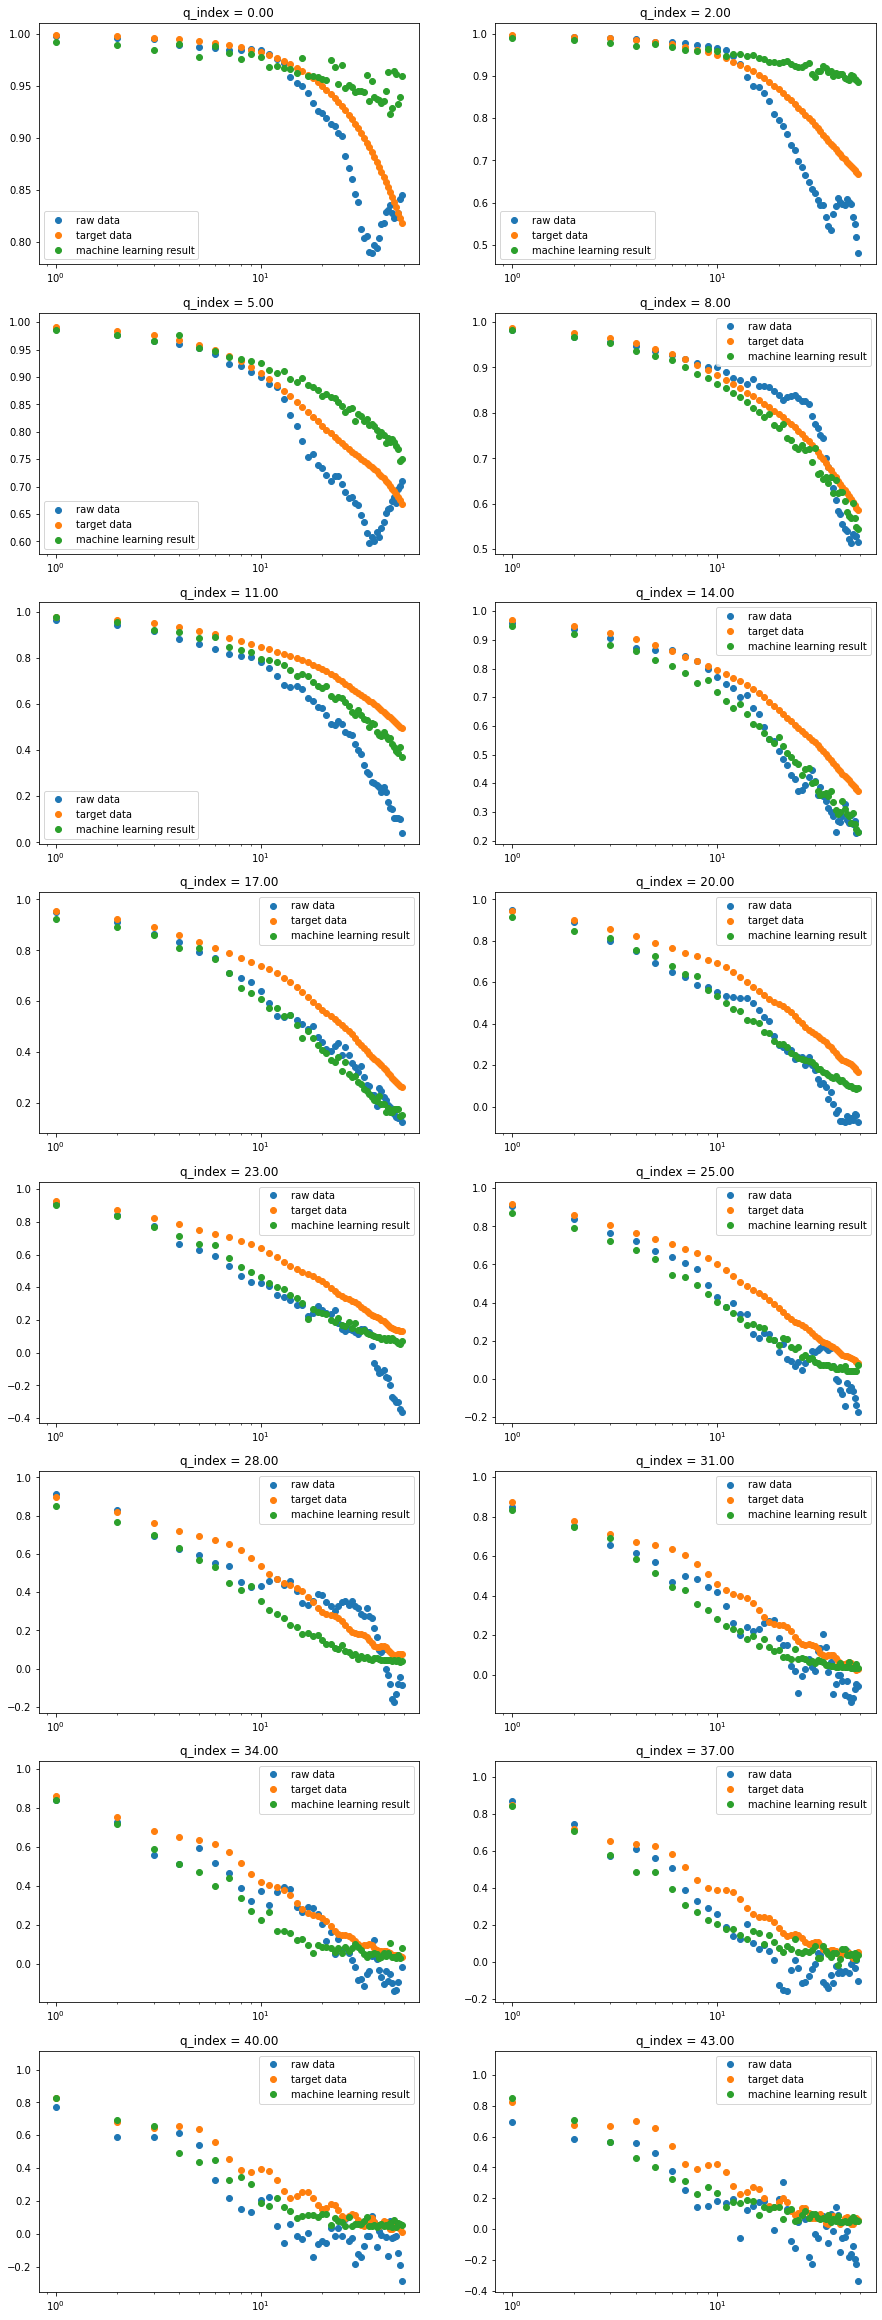

In [20]:
#plot all q values, you can specify the number of plots
index = 6
num_plots = 16
plt.subplots(4,2,figsize = [15,120*num_plots/46])
X_new_avg_save = np.zeros((46,50))

for i in range(num_plots):
    q_index = i*46//num_plots
    X_plot = X[index,0,:,q_index]
    X_targ_plot = X_targ[index,0,:,q_index]
    X_new_plot = X_new[index,0,:,q_index].detach().numpy()
    X_new_avg_save[i,:] = X_new_plot
    plt.subplot(num_plots//2,2,i+1)
    q_value = index
    plt.title('q_index = %.2f' %(q_index))
    plt.semilogx(X_plot,'o',label = 'raw data')
    plt.plot(X_targ_plot,'o',label = 'target data')
    plt.plot(X_new_plot,'o',label = 'machine learning result')
    plt.legend()

In [ ]:
#this is where we automate getting the diffusion coefficients
index = 0
num_q_values = 46
lagtime= 50
noisydata = np.zeros((lagtime, num_q_values))
cnn_output = np.zeros((lagtime,num_q_values))
targetdata = np.zeros((lagtime,num_q_values))

for i in range(num_q_values):
    targetdata[:,i] = X_targ[index,0,:,i]
    noisydata[:,i] = X[index,0,:,i]
    cnn_output[:,i] = X_new[index,0,:,i].detach().numpy()
    
    

In [66]:
dc = []
it = 0

In [67]:
for c in range(38):
    index = it
    num_q_values = 46
    lagtime= 50
    noisydata = np.zeros((lagtime, num_q_values))
    cnn_output = np.zeros((lagtime,num_q_values))
    targetdata = np.zeros((lagtime,num_q_values))

    for i in range(num_q_values):
        targetdata[:,i] = X_targ[index,0,:,i]
        noisydata[:,i] = X[index,0,:,i]
        cnn_output[:,i] = X_new[index,0,:,i].detach().numpy()
    ds = xr.Dataset({'ddm_matrix': (['lagtime','q'], np.nan_to_num(cnn_output)[:,:])},
                     coords={'lagtime': np.arange(1,51)/frame_rate,
                            'q': ddm_calc.q[1:47]}) #S[1:47] for the adjusted q range
    ds['num_pairs_per_dt'] = (('lagtime'), np.ones_like(ds.lagtime))
    ds['Amplitude'] = np.ones_like(ds.q)
    ds['B'] = np.ones_like(ds.q)
    ds['ISF'] = ds.ddm_matrix
    ds['DataDirectory'] = "./"
    ds['FileName'] = "test"
    ds['pixel_size'] = ddm_calc.pixel_size
    ds['frame_rate'] = ddm_calc.frame_rate
    parameters_as_dictionary['Fitting_parameters']['model'] = 'ISF - Single Exponential'

    import importlib
    importlib.reload(ddm)
    ddm_fit2 = ddm.DDM_Fit(parameters_as_dictionary)
    ddm_fit2.set_parameter_bounds('Tau',[0.001, 1000])
    ddm_fit2.ddm_dataset = ds
    fit02 = ddm_fit2.fit(name_fit = 'fit02', display_table=False)
    xr.Dataset(fit02).to_netcdf(".\\ddmfits\\"+data_file+"fit_of_ddmmatrix_50frames_machinelearning.nc")
    estimated_diff_coeff = np.mean(1./(fit02.parameters.loc['Tau'][2:23] * fit02.q * fit02.q))
    dc.append(estimated_diff_coeff)
    it = it+200
    print(it)

,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
200


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
400


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
600


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
800


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
1000


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
1200


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
1400


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
1600


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
1800


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
2000


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
2200


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
2400


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
2600


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
2800


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
3000


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
3200


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
3400


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
3600


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
3800


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
4000


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
4200


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
4400


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
4600


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
4800


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
5000


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
5200


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
5400


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
5600


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
5800


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
6000


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
6200


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
6400


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
6600


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
6800


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
7000


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
7200


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
7400


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.
7600


In [68]:
len(dc)

38

In [69]:
#calculating length traveled every 50 frames
#5 um/sec * 200 frames * sec/25 frames = 40um per 50
dist = []
d = 0
for i in range(38):
    d=d+40
    dist.append(d)

In [70]:
len(dist)

38

In [ ]:
dist[3]

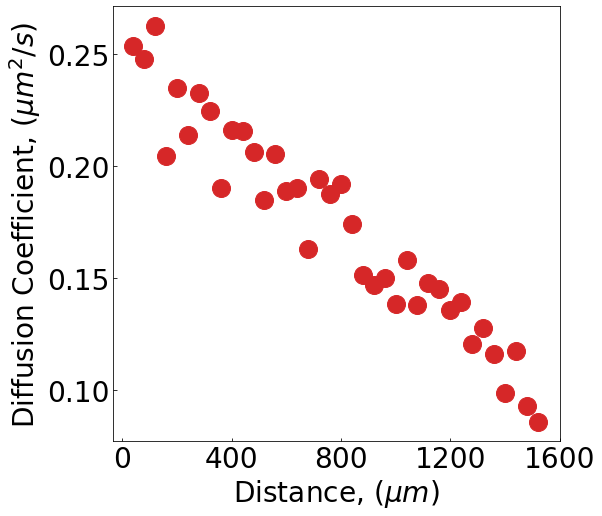

In [71]:
##########################################################
#        PLOTTING DIFFUSION COEFFICIENT VS DISTANCE      #
##########################################################


cmap = plt.get_cmap("cool") #colormap to use


fig,ax = plt.subplots(figsize=(8,8))


ax.plot(dist[:],dc[:], 'o', color='tab:red', ms=18)
#ax.loglog(fit01.q[lowq:hiq], 1./(0.149*fit01.q[lowq:hiq]**2), '-k', alpha=0.3, lw=6)



ax.set_xlabel("Distance, ($\mu m$)", fontsize=28)
ax.set_ylabel("Diffusion Coefficient, ($\mu m^{2} / s$)", fontsize=28)
ax.tick_params(direction='in', which='both', labelsize=28)

ax.set_xticks([0, 400, 800, 1200, 1600])
ax.set_xticklabels(['0','400', '800','1200','1600'])

plt.savefig("tau_vs_q.png",bbox_inches ='tight')

In [39]:
ds = xr.Dataset({'ddm_matrix': (['lagtime','q'], np.nan_to_num(cnn_output)[:,:])},
                 coords={'lagtime': np.arange(1,51)/frame_rate,
                        'q': ddm_calc.q[1:47]}) #S[1:47] for the adjusted q range
ds['num_pairs_per_dt'] = (('lagtime'), np.ones_like(ds.lagtime))
ds['Amplitude'] = np.ones_like(ds.q)
ds['B'] = np.ones_like(ds.q)
ds['ISF'] = ds.ddm_matrix
ds['DataDirectory'] = "./"
ds['FileName'] = "test"
ds['pixel_size'] = ddm_calc.pixel_size
ds['frame_rate'] = ddm_calc.frame_rate

In [40]:
parameters_as_dictionary['Fitting_parameters']['model'] = 'ISF - Single Exponential'

In [41]:
#parameters_as_dictionary['Fitting_parameters']['Tau'] = [10,0.01, 1000]
#parameters_as_dictionary['Fitting_parameters']['NonErgodic'] = [0.6,0.01, 1]

In [42]:
import importlib
importlib.reload(ddm)
ddm_fit2 = ddm.DDM_Fit(parameters_as_dictionary)
ddm_fit2.set_parameter_bounds('Tau',[0.001, 1000])
ddm_fit2.ddm_dataset = ds
fit02 = ddm_fit2.fit(name_fit = 'fit02', display_table=False)
xr.Dataset(fit02).to_netcdf(".\\ddmfits\\"+data_file+"fit_of_ddmmatrix_50frames_machinelearning.nc")
#ddm.fit_report(fit02, q_indices=[3,6,9,22], forced_qs=[4,16], use_new_tau=True, show=True)


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit02'.


In [43]:
ds = xr.Dataset({'ddm_matrix': (['lagtime','q'], np.nan_to_num(noisydata)[:,:])},
                 coords={'lagtime': np.arange(1,51)/frame_rate,
                        'q': ddm_calc.q[1:47]})
ds['num_pairs_per_dt'] = (('lagtime'), np.ones_like(ds.lagtime))
ds['Amplitude'] = np.ones_like(ds.q)
ds['B'] = np.ones_like(ds.q)
ds['ISF'] = ds.ddm_matrix
ds['DataDirectory'] = "./"
ds['FileName'] = "test"
ds['pixel_size'] = ddm_calc.pixel_size
ds['frame_rate'] = ddm_calc.frame_rate

ddm_fit3 = ddm.DDM_Fit(parameters_as_dictionary)
ddm_fit3.set_parameter_bounds('Tau',[0.001, 1000])
ddm_fit3.ddm_dataset = ds
fit03 = ddm_fit3.fit(name_fit = 'fit03', display_table=False)
xr.Dataset(fit03).to_netcdf(".\\ddmfits\\"+data_file +"fit_of_ddmmatrix_50frames.nc")

,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit03'.


In [44]:
ds = xr.Dataset({'ddm_matrix': (['lagtime','q'], np.nan_to_num(targetdata)[:,:])},
                 coords={'lagtime': np.arange(1,51)/frame_rate,
                        'q': ddm_calc.q[1:47]})
ds['num_pairs_per_dt'] = (('lagtime'), np.ones_like(ds.lagtime))
ds['Amplitude'] = np.ones_like(ds.q)
ds['B'] = np.ones_like(ds.q)
ds['ISF'] = ds.ddm_matrix
ds['DataDirectory'] = "./"
ds['FileName'] = "test"
ds['pixel_size'] = ddm_calc.pixel_size
ds['frame_rate'] = ddm_calc.frame_rate

ddm_fit1tar = ddm.DDM_Fit(parameters_as_dictionary)
ddm_fit1tar.set_parameter_bounds('Tau',[0.001, 1000])
ddm_fit1tar.ddm_dataset = ds
fit1tar = ddm_fit1tar.fit(name_fit = 'fit1tar', display_table=False)
xr.Dataset(fit1tar).to_netcdf(".\\ddmfits\\"+data_file +"fit_of_ddmmatrix_1tar.nc")

,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,3.1


Loading file C:\Users\jamss\Downloads\StevenData\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1\1umBead_DexGrad_Control_52min_0.0mm_Sweep_1_MMStack_Pos0.ome_ddmmatrix.nc ...
Parameter 'Tau' lower limit set to 0.001.
Parameter 'Tau' upper limit set to 1000.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit1tar'.


In [45]:
error_50frame =fit01.parameters.loc['Tau']-fit03.parameters.loc['Tau']
error_CNN = fit01.parameters.loc['Tau']-fit02.parameters.loc['Tau']

log_error_50frame = abs(np.log(fit01.parameters.loc['Tau'])-np.log(fit03.parameters.loc['Tau']))
log_error_CNN = abs(np.log(fit01.parameters.loc['Tau'])-np.log(fit02.parameters.loc['Tau']))

In [46]:
fit02

<xarray.Dataset>
Dimensions:          (parameter: 2, q: 46, lagtime: 50, Amplitude: 46, B: 46)
Coordinates:
  * parameter        (parameter) <U13 'Tau' 'StretchingExp'
  * q                (q) float64 0.1312 0.2625 0.3937 ... 5.775 5.906 6.037
  * lagtime          (lagtime) float64 0.04 0.08 0.12 0.16 ... 1.92 1.96 2.0
  * Amplitude        (Amplitude) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
  * B                (B) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
Data variables:
    parameters       (parameter, q) float64 353.2 179.7 49.17 ... 0.8567 0.8264
    theory           (lagtime, q) float64 0.9942 0.996 ... 0.006082 0.007884
    isf_data         (lagtime, q) float64 0.9974 0.9948 1.0 ... 0.06603 0.05937
    ddm_matrix_data  (lagtime, q) float64 0.9974 0.9948 1.0 ... 0.06603 0.05937
    A                (Amplitude) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
Attributes: (12/16)
    model:                          ISF - Single Exponential
    data_to_use:                    ISF
    initial_params_dict:            ["{'n': 0, 'value': 1.0, 'limits': [0.001...
    effective_diffusion_coeff:      0.18816040099522094
    tau_vs_q_slope:                 [-2.02659974]
    msd_alpha:                      [0.98687469]
    ...                             ...
    velocity_std:                   0.10849937613223512
    good_q_range:                   [4, 19]
    DataDirectory:                  <xarray.DataArray 'DataDirectory' ()>\nar...
    FileName:                       <xarray.DataArray 'FileName' ()>\narray('...
    pixel_size:                     <xarray.DataArray 'pixel_size' ()>\narray...
    frame_rate:                     <xarray.DataArray 'frame_rate' ()>\narray...

Esimated diffusion coeff:  <xarray.DataArray ()>
array(0.18864754)
Coordinates:
    parameter  <U13 'Tau'
Esimated diffusion coeff std:  <xarray.DataArray ()>
array(0.0043073)
Coordinates:
    parameter  <U13 'Tau'
Esimated diffusion coeff raw:  <xarray.DataArray ()>
array(0.2168834)
Coordinates:
    parameter  <U13 'Tau'
Esimated diffusion coeff std raw:  <xarray.DataArray ()>
array(0.01365766)
Coordinates:
    parameter  <U13 'Tau'


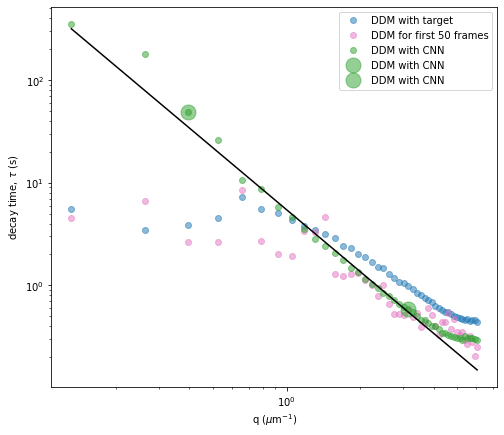

In [53]:
%matplotlib inline
plt.figure(figsize=(8,7))

plt.loglog(fit1tar.q, fit1tar.parameters.loc['Tau'], 'o', color='tab:blue', label="DDM with target", alpha = 0.5)
plt.loglog(fit03.q, fit03.parameters.loc['Tau'], 'o', color='tab:pink', label="DDM for first 50 frames", alpha = 0.5)
plt.loglog(fit02.q, fit02.parameters.loc['Tau'], 'o', color='tab:green', label="DDM with CNN", alpha = 0.5)

plt.loglog(fit02.q[2], fit02.parameters.loc['Tau'][2], 'o', color='tab:green', label="DDM with CNN", alpha = 0.5, ms = 15)
plt.loglog(fit02.q[23], fit02.parameters.loc['Tau'][23], 'o', color='tab:green', label="DDM with CNN", alpha = 0.5, ms = 15)

plt.plot(fit02.q, 1/(fit02.q**2 * 0.183), '-k')

plt.xlabel("q ($\mu$m$^{-1}$)")
plt.ylabel("decay time, $\\tau$ (s)")
#plt.xlim(0.8,9.4)
#plt.ylim(0,5.5)

plt.legend(loc=0)

estimated_diff_coeff = np.mean(1./(fit02.parameters.loc['Tau'][2:23] * fit02.q * fit02.q))
print("Esimated diffusion coeff: ", estimated_diff_coeff)
estimated_diff_coeff_std = np.std(1./(fit02.parameters.loc['Tau'][2:23] * fit02.q * fit02.q))/(21**0.5)
print("Esimated diffusion coeff std: ", estimated_diff_coeff_std)

estimated_diff_coeff_raw = np.mean(1./(fit03.parameters.loc['Tau'][10:23] * fit03.q * fit03.q))
print("Esimated diffusion coeff raw: ", estimated_diff_coeff_raw)
estimated_diff_coeff_std_raw = (np.std(1./(fit03.parameters.loc['Tau'][10:23] * fit02.q * fit02.q)))/(13**0.5)
print("Esimated diffusion coeff std raw: ", estimated_diff_coeff_std_raw)

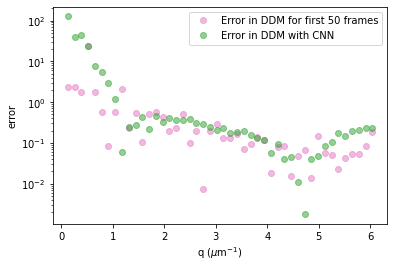

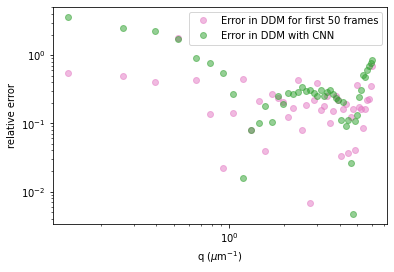

In [40]:
plt.figure()
plt.semilogy(fit02.q, abs(error_50frame), 'o', color='tab:pink', label="Error in DDM for first 50 frames", alpha = 0.5)
plt.semilogy(fit02.q, abs(error_CNN), 'o', color='tab:green', label="Error in DDM with CNN", alpha = 0.5)
plt.xlabel("q ($\mu$m$^{-1}$)")
plt.ylabel("error")
plt.legend(loc=0)

plt.figure()
plt.loglog(fit02.q, abs(log_error_50frame), 'o', color='tab:pink', label="Error in DDM for first 50 frames", alpha = 0.5)
plt.plot(fit02.q, abs(log_error_CNN), 'o', color='tab:green', label="Error in DDM with CNN", alpha = 0.5)
plt.xlabel("q ($\mu$m$^{-1}$)")
plt.ylabel("relative error")
plt.legend(loc=0)

# Generating errors for each small frame

In [125]:
ae = torch.load(output_dir+autoencoder,map_location=torch.device('cpu'))
num_small_frames = 8 #number of small frames
num_q_values = 46 #number of q-indexs
lagtime= 50 #lagtime for each q-t matrix
#creating error matrix for storing the data
error_50frame = np.zeros((num_small_frames,num_q_values))
error_CNN = np.zeros_like(error_50frame)
print(error_50frame.shape)
data_file = 'bead_dilution60_2949' #file that for machine learning and comparing
for i in range(num_small_frames):
    index = i
    ds = CorrDataSet_noshuffle(training_dataset_path+data_file)
    #print(ds.uids)
    dataloader = DataLoader(ds, batch_size=8, shuffle=False, num_workers=0)
    a = dataloader
    a=next(iter(dataloader))
    X = a["data"].float().to('cpu')
    X_targ = a["target"].float().to('cpu')
    
    X_new = ae(X)
    X_save = np.zeros((lagtime, num_q_values))
    X_new_save = np.zeros((lagtime,num_q_values))
    
    for i in range(num_q_values):
        noisydata[:,i] = X[index,0,:,i]
        cnn_output[:,i] = X_new[index,0,:,i].detach().numpy()
####################################################################################################################
    ds = xr.Dataset({'ddm_matrix': (['lagtime','q'], np.nan_to_num(X_new_save)[:,:])},
                     coords={'lagtime': np.arange(1,51)/frame_rate,
                            'q': ddm_calc.q[1:47]})
    ds['num_pairs_per_dt'] = (('lagtime'), np.ones_like(ds.lagtime))
    ds['Amplitude'] = np.ones_like(ds.q)
    ds['B'] = np.ones_like(ds.q)
    ds['ISF'] = ds.ddm_matrix
    ds['DataDirectory'] = "./"
    ds['FileName'] = "test"
    ds['pixel_size'] = ddm_calc.pixel_size
    ds['frame_rate'] = ddm_calc.frame_rate
    ddm_fit2 = ddm.DDM_Fit(parameters_as_dictionary)
    ddm_fit2.ddm_dataset = ds
    fit02 = ddm_fit2.fit(name_fit = 'fit02', display_table=False)
    xr.Dataset(fit02).to_netcdf(".\\ddmfits\\"+data_file+"fit_of_ddmmatrix_50frames_mechinelearning.nc")
####################################################################################################################
    ds = xr.Dataset({'ddm_matrix': (['lagtime','q'], np.nan_to_num(X_save)[:,:])},
                     coords={'lagtime': np.arange(1,51)/frame_rate,
                            'q': ddm_calc.q[1:47]})
    ds['num_pairs_per_dt'] = (('lagtime'), np.ones_like(ds.lagtime))
    ds['Amplitude'] = np.ones_like(ds.q)
    ds['B'] = np.ones_like(ds.q)
    ds['ISF'] = ds.ddm_matrix
    ds['DataDirectory'] = "./"
    ds['FileName'] = "test"
    ds['pixel_size'] = ddm_calc.pixel_size
    ds['frame_rate'] = ddm_calc.frame_rate

    ddm_fit3 = ddm.DDM_Fit(parameters_as_dictionary)
    ddm_fit3.ddm_dataset = ds
    fit03 = ddm_fit3.fit(name_fit = 'fit03', display_table=False)
    xr.Dataset(fit03).to_netcdf(".\\ddmfits\\"+data_file +"fit_of_ddmmatrix_50frames.nc")
####################################################################################################################
    error_50frame[i,:] =fit01.parameters.loc['Tau']-fit03.parameters.loc['Tau']
    error_CNN[i,:] = fit01.parameters.loc['Tau']-fit02.parameters.loc['Tau']

(8, 46)


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,1.1


Loading file Z:\JJ\Steven Gradient Bead Data\LocallyStevensData\2022-07-25_Bead Dilutions\1umBead_3g_5w_20pb_T10_1\1umBead_3g_5w_20pb_T10_1_MMStack_Pos0.ome_ddmmatrix.nc ...
In function 'get_tau_vs_q_fit', using new tau...
RANSAC failed
Fit is saved in fittings dictionary with key 'fit02'.


,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,1.1


Loading file Z:\JJ\Steven Gradient Bead Data\LocallyStevensData\2022-07-25_Bead Dilutions\1umBead_3g_5w_20pb_T10_1\1umBead_3g_5w_20pb_T10_1_MMStack_Pos0.ome_ddmmatrix.nc ...
In function 'get_tau_vs_q_fit', using new tau...
RANSAC failed
Fit is saved in fittings dictionary with key 'fit03'.


IndexError: index 45 is out of bounds for axis 0 with size 8

In [ ]:
print(error_50frame.shape)

In [126]:
TCF_Training_Prep.save_data('./error_50frame_8_12_60v2',error_50frame)
TCF_Training_Prep.save_data('./error_CNN_8_12_60v2',error_CNN)

In [127]:
print(np.max(error_50frame))

0.0


In [128]:
avg_error_50frame = abs(error_50frame).mean(axis=0)
avg_error_CNN = abs(error_CNN).mean(axis=0)

<IPython.core.display.Javascript object>


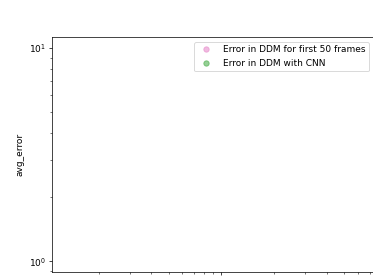

In [132]:
%matplotlib notebook
plt.figure(figsize=[6.4,4.8])
plt.loglog(fit02.q, avg_error_50frame, 'o', color='tab:pink', label="Error in DDM for first 50 frames", alpha = 0.5)
plt.plot(fit02.q, avg_error_CNN, 'o', color='tab:green', label="Error in DDM with CNN", alpha = 0.5)
#plt.xlim(0.8,7.4)
#plt.ylim(0.0002,20)
plt.xlabel("q ($\mu$m$^{-1}$)")
plt.ylabel('avg_error')
plt.legend()

In [131]:
%matplotlib inline
plt.figure(figsize=[6.4,4.8])
plt.semilogy(fit01.q, avg_error_50frame/fit01.parameters.loc['Tau'], 'o', color='tab:pink', label="Error in DDM for first 50 frames", alpha = 0.5)
plt.plot(fit01.q, avg_error_CNN/fit01.parameters.loc['Tau'], 'o', color='tab:green', label="Error in DDM with CNN", alpha = 0.5)
plt.xlim(0.8,7.4)
plt.ylim(0.0004,)
plt.title('relative_error')
plt.xlabel("q ($\mu$m$^{-1}$)")
plt.ylabel('avg_error')
plt.legend()

ValueError: operands could not be broadcast together with shapes (46,) (64,) 

<Figure size 460.8x345.6 with 0 Axes>

In [155]:
error_50frame = TCF_Training_Prep.load_data('./error_50frame')
error_CNN = TCF_Training_Prep.load_data('./error_CNN')

FileNotFoundError: [Errno 2] No such file or directory: './error_50frame'